In [19]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from os import listdir
from tensorflow.keras.preprocessing.image import img_to_array
import cv2

In [20]:
def convert_imagetoarray(fpath):
    
    #f="E:\\skindataset\\benign\\1.jpg"
    img=cv2.imread(fpath)
    img=cv2.resize(img,(224,224))
    res=img_to_array(img)
    return res

In [21]:
root_dir="./Dataset"

In [22]:
dire=listdir(root_dir)

image_dataset=[]
image_label=[]

binary_label=[0,1]

index=0

for subdir in dire:
    
    fpath=f"{root_dir}/{subdir}"
    skin_img_list=listdir(fpath)
    
    for imgfile in skin_img_list:
        filepath=f"{root_dir}/{subdir}/{imgfile}"
        #print(filepath)
        res=convert_imagetoarray(filepath)
        image_dataset.append(res)
        image_label.append(binary_label[index])
    
    index+=1
    

print(image_dataset)
print(image_label)
    
    




[array([[[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [251., 255., 243.],
        [251., 255., 242.],
        [251., 255., 242.]],

       [[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [251., 255., 247.],
        [251., 255., 246.],
        [251., 255., 246.]],

       [[254., 255., 253.],
        [254., 255., 253.],
        [254., 255., 253.],
        ...,
        [253., 252., 253.],
        [253., 252., 253.],
        [253., 252., 253.]],

       ...,

       [[253., 254., 252.],
        [253., 254., 252.],
        [253., 254., 252.],
        ...,
        [253., 254., 252.],
        [253., 254., 252.],
        [254., 255., 253.]],

       [[253., 254., 252.],
        [253., 254., 252.],
        [253., 254., 252.],
        ...,
        [253., 254., 252.],
        [253., 254., 252.],
        [254., 255., 253.]],

       [[253., 254., 252.],
        [253., 254., 252.],
        [253., 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(image_dataset,image_label,test_size=0.2,random_state=100)

In [27]:
import numpy as np
xtrain = np.array(xtrain, dtype=np.float16) / 255.0
xtest = np.array(xtest, dtype=np.float16) / 255.0



In [29]:
xtrain = xtrain.reshape( -1, 224,224,3)
xtest = xtest.reshape( -1, 224,224,3)


In [30]:
from tensorflow.keras.models import Sequential

In [31]:
model=Sequential()

In [32]:
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D((2,2)))

In [33]:
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

In [34]:
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))

In [35]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [36]:
from tensorflow.keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [55]:
model.fit(xtrain, ytrain, epochs = 100, batch_size = 64)

Epoch 1/100
3/3 [==============================] - 5s 2s/step - loss: 0.4543 - accuracy: 0.8295
Epoch 2/100
3/3 [==============================] - 5s 2s/step - loss: 0.4528 - accuracy: 0.8011
Epoch 3/100
3/3 [==============================] - 5s 2s/step - loss: 0.4053 - accuracy: 0.8693
Epoch 4/100
3/3 [==============================] - 5s 2s/step - loss: 0.4253 - accuracy: 0.8523
Epoch 5/100
3/3 [==============================] - 5s 2s/step - loss: 0.3888 - accuracy: 0.8409
Epoch 6/100
3/3 [==============================] - 5s 1s/step - loss: 0.3769 - accuracy: 0.8693
Epoch 7/100
3/3 [==============================] - 5s 2s/step - loss: 0.3514 - accuracy: 0.8807
Epoch 8/100
3/3 [==============================] - 5s 2s/step - loss: 0.3478 - accuracy: 0.8750
Epoch 9/100
3/3 [==============================] - 5s 2s/step - loss: 0.3445 - accuracy: 0.8807
Epoch 10/100
3/3 [==============================] - 5s 2s/step - loss: 0.3539 - accuracy: 0.8580
Epoch 11/100
3/3 [=====================

In [50]:
model.save("lumpymodel.h5")

In [51]:
pred=model.predict(xtest[0,:].reshape(1,224,224,3))

pred

1/1 [==============================] - 0s 35ms/step


array([[0.3445434 , 0.63843364]], dtype=float32)

In [52]:
index=np.argmax(pred)

labels=['Healthy','Lumpy']

infer=labels[index]
print("result of classification = ",infer)

result of classification =  Lumpy


In [53]:
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img

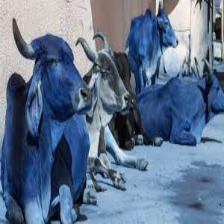

In [54]:
img=array_to_img(xtest[0])
img